# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("End")

Beginning Data Retrieval 
Processing Record 1 of Set 1 : avarua
Processing Record 2 of Set 1 : tilichiki
Processing Record 3 of Set 1 : hay river
Processing Record 4 of Set 1 : arman
Processing Record 5 of Set 1 : provideniya
Processing Record 6 of Set 1 : kaitangata
Processing Record 7 of Set 1 : port blair
Processing Record 8 of Set 1 : masakin
Processing Record 9 of Set 1 : luderitz
Processing Record 10 of Set 1 : punta arenas
Processing Record 11 of Set 1 : san ignacio
Processing Record 12 of Set 1 : hithadhoo
Processing Record 13 of Set 1 : port pirie
Processing Record 14 of Set 1 : bintulu
Processing Record 15 of Set 1 : klaksvik
Processing Record 16 of Set 1 : lagoa
Processing Record 17 of Set 1 : hobart
Processing Record 18 of Set 1 : ushuaia
City not found. Skipping...
Processing Record 19 of Set 1 : thinadhoo
Processing Record 20 of Set 1 : sydney
Processing Record 21 of Set 1 : kirakira
Processing Record 22 of Set 1 : alta floresta
Processing Record 23 of Set 1 : geraldton
P

Processing Record 35 of Set 4 : gejiu
Processing Record 36 of Set 4 : lebu
Processing Record 37 of Set 4 : uvarovka
City not found. Skipping...
Processing Record 38 of Set 4 : peruibe
Processing Record 39 of Set 4 : maumere
City not found. Skipping...
Processing Record 40 of Set 4 : cafarnaum
Processing Record 41 of Set 4 : faya
Processing Record 42 of Set 4 : beringovskiy
Processing Record 43 of Set 4 : lata
Processing Record 44 of Set 4 : odienne
Processing Record 45 of Set 4 : nouadhibou
Processing Record 46 of Set 4 : buraydah
Processing Record 47 of Set 4 : aswan
Processing Record 48 of Set 4 : laguna
Processing Record 49 of Set 4 : faanui
Processing Record 50 of Set 4 : borovoy
Processing Record 0 of Set 5 : pangkalanbuun
Processing Record 1 of Set 5 : mandan
Processing Record 2 of Set 5 : requena
Processing Record 3 of Set 5 : ternate
Processing Record 4 of Set 5 : gat
City not found. Skipping...
Processing Record 5 of Set 5 : mattru
Processing Record 6 of Set 5 : vao
Processing

Processing Record 19 of Set 8 : akdagmadeni
Processing Record 20 of Set 8 : sorland
Processing Record 21 of Set 8 : guaraniacu
Processing Record 22 of Set 8 : norsup
Processing Record 23 of Set 8 : camargo
Processing Record 24 of Set 8 : bambous virieux
Processing Record 25 of Set 8 : tuatapere
Processing Record 26 of Set 8 : narasannapeta
Processing Record 27 of Set 8 : shingu
City not found. Skipping...
Processing Record 28 of Set 8 : saint-denis
Processing Record 29 of Set 8 : qui nhon
Processing Record 30 of Set 8 : pangai
Processing Record 31 of Set 8 : sironj
City not found. Skipping...
Processing Record 32 of Set 8 : naze
Processing Record 33 of Set 8 : severo-yeniseyskiy
Processing Record 34 of Set 8 : andros town
City not found. Skipping...
Processing Record 35 of Set 8 : adre
Processing Record 36 of Set 8 : inhambane
Processing Record 37 of Set 8 : dauriya
Processing Record 38 of Set 8 : svetlogorsk
Processing Record 39 of Set 8 : ahipara
Processing Record 40 of Set 8 : orel-

Processing Record 3 of Set 12 : lavrentiya
Processing Record 4 of Set 12 : banda aceh
Processing Record 5 of Set 12 : puerto escondido
City not found. Skipping...
Processing Record 6 of Set 12 : oriximina
Processing Record 7 of Set 12 : yanam
Processing Record 8 of Set 12 : kulhudhuffushi
Processing Record 9 of Set 12 : kjollefjord
Processing Record 10 of Set 12 : evensk
Processing Record 11 of Set 12 : inta
Processing Record 12 of Set 12 : tiznit
Processing Record 13 of Set 12 : muros
Processing Record 14 of Set 12 : mumford
End


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
# Count data
weather_dict.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [7]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Avarua,93,CK,1600152016,68,-21.21,-159.78,71.60,6.93
1,Tilichiki,96,RU,1600152016,73,60.47,166.10,44.76,9.80
2,Hay River,75,CA,1600151799,87,60.82,-115.80,42.80,6.93
3,Arman',100,RU,1600152017,77,59.70,150.17,53.55,5.44
4,Provideniya,75,RU,1600152017,71,64.38,-173.30,50.00,11.18
...,...,...,...,...,...,...,...,...,...
570,Evensk,99,RU,1600152246,69,61.95,159.23,47.75,6.42
571,Inta,9,RU,1600152246,70,66.03,60.17,53.44,8.48
572,Tiznit Province,100,MA,1600152246,45,29.58,-9.50,73.90,1.57
573,Muros,71,ES,1600152247,84,42.78,-9.06,66.00,7.00


In [8]:
# Save city data into a csv file
weather_dict.to_csv("analysis_data.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

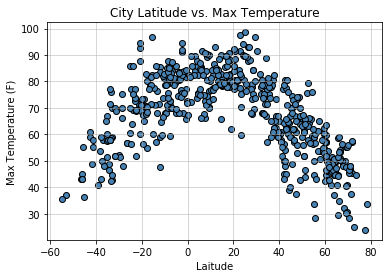

In [9]:
#Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

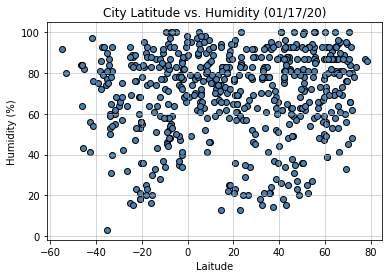

In [10]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

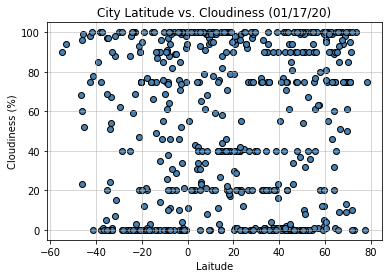

In [11]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

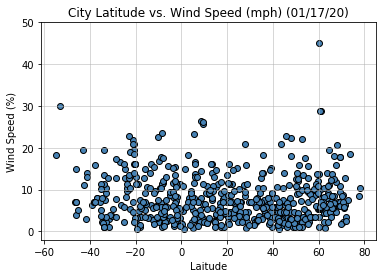

In [12]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [14]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.82


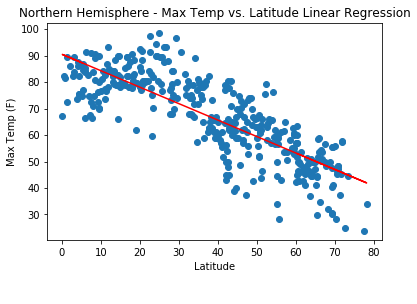

In [15]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.72


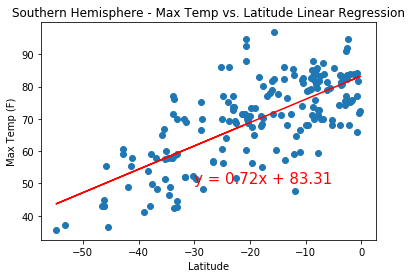

In [16]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.03


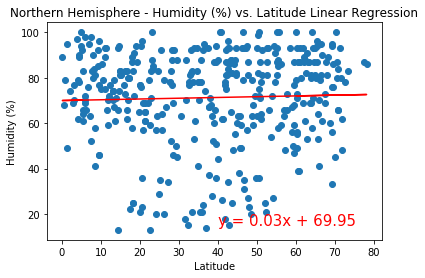

In [17]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.02


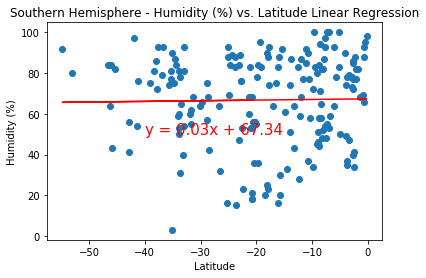

In [18]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.09


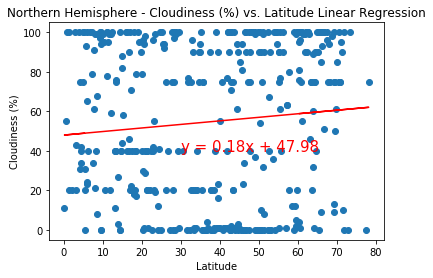

In [19]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.06


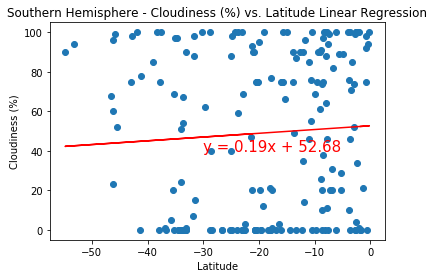

In [20]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.05


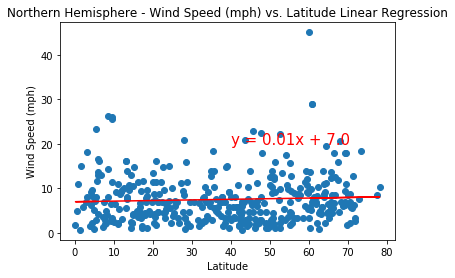

In [21]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.15


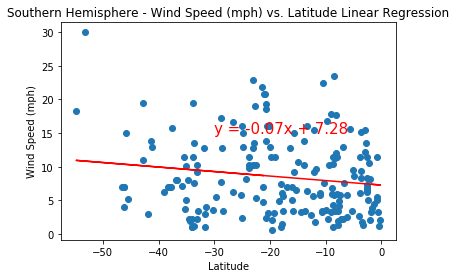

In [22]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [23]:
#Observations

In [24]:
#As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases
#It seems that there is no correlation between humidity and latitude
#Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic